In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [25]:
file_name = 'pre_processado_completo.csv'

df = pd.read_csv(file_name, header=0, error_bad_lines=False, warn_bad_lines=False)

In [26]:
df.head()

,city,state,country,shape,duration_m,comments,latitude,longitude,date
0,san marcos,tx,us,cylinder,45.000000,This event took place in early fall around 194...,29.883056,-97.941111,1949-10-10
1,lackland afb,tx,NaN,light,120.000000,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082,1949-10-10
2,chester (uk/england),NaN,gb,circle,0.333333,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667,1955-10-10
3,edna,tx,us,circle,0.333333,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956-10-10
4,kaneohe,hi,us,light,15.000000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960-10-10


In [27]:
df_us = df.loc[df['country'] == 'us']
df_us.head()

,city,state,country,shape,duration_m,comments,latitude,longitude,date
0,san marcos,tx,us,cylinder,45.000000,This event took place in early fall around 194...,29.883056,-97.941111,1949-10-10
3,edna,tx,us,circle,0.333333,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956-10-10
4,kaneohe,hi,us,light,15.000000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960-10-10
5,bristol,tn,us,sphere,5.000000,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961-10-10
7,norwalk,ct,us,disk,20.000000,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965-10-10


In [28]:
lat_lon = np.array(df_us[['longitude', 'latitude']]).astype(float)

In [29]:
print(len(lat_lon))
print(lat_lon)

70290
[[ -97.9411111   29.8830556]
 [ -96.6458333   28.9783333]
 [-157.8036111   21.4180556]
 ...
 [ -97.4777778   35.6527778]
 [ -82.6958333   34.3769444]
 [ -80.1436111   26.1219444]]


In [30]:
states = list(df_us['state'])

In [31]:
pesos = [states.count(s) for s in states]

In [36]:
kmeans = KMeans(n_clusters=19, max_iter=2000)
scaler = MinMaxScaler()
kmeans.fit(scaler.fit_transform(lat_lon), sample_weight=pesos)
lat_lon_scaled = np.array(scaler.fit_transform(lat_lon))
lat_lon_scaled

array([[0.71027257, 0.22622871],
       [0.72196002, 0.20905126],
       [0.17012595, 0.06550849],
       ...,
       [0.71445329, 0.3357752 ],
       [0.84783257, 0.31155167],
       [0.87086158, 0.1548186 ]])

In [37]:
centers = kmeans.cluster_centers_
centers

array([[0.72070231, 0.22235711],
       [0.8602868 , 0.32787729],
       [0.49720188, 0.37722524],
       [0.92247877, 0.46889929],
       [0.49576528, 0.55404901],
       [0.17405701, 0.05880549],
       [0.80917525, 0.45890184],
       [0.83935999, 0.23366632],
       [0.53025916, 0.30289412],
       [0.24874659, 0.83319218],
       [0.86077997, 0.1765969 ],
       [0.63535701, 0.41282764],
       [0.84962672, 0.42325475],
       [0.76496637, 0.51384816],
       [0.76847693, 0.3852195 ],
       [0.58892142, 0.29420866],
       [0.91732267, 0.42565   ],
       [0.71532719, 0.28600269],
       [0.49031557, 0.43999083]])

In [38]:
locations = kmeans.labels_.astype(float)
print(len(locations))
locations

70290


array([ 0.,  0.,  5., ..., 17.,  1., 10.])

Text(0, 0.5, 'Longitude')

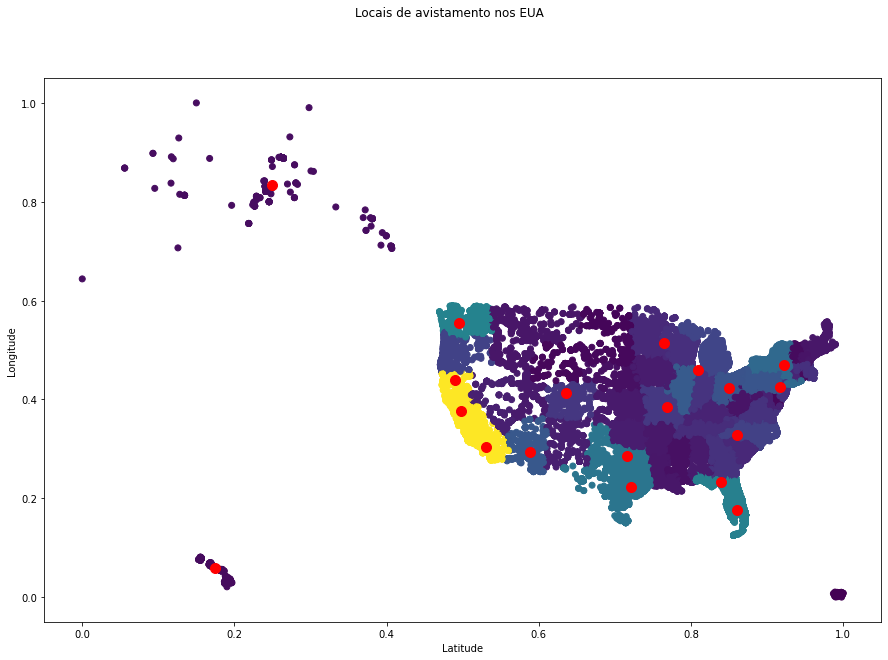

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(lat_lon_scaled[:, 0], lat_lon_scaled[:, 1], c=pesos)
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
fig.suptitle('Locais de avistamento nos EUA')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

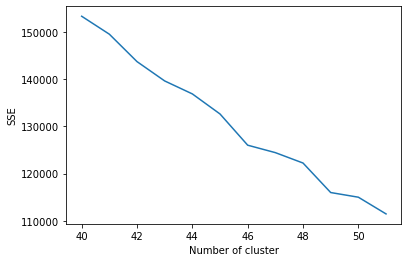

In [89]:
from sklearn.cluster import KMeans
sse = {}
for k in range(40, 52):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(lat_lon)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

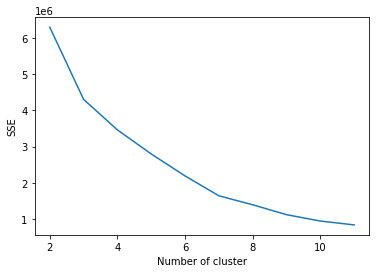

In [90]:
from sklearn.cluster import KMeans
sse = {}
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(lat_lon)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

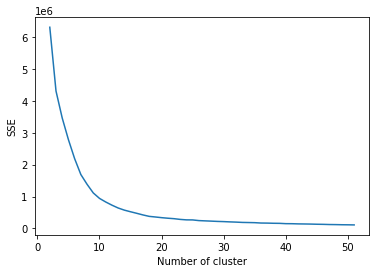

In [95]:
from sklearn.cluster import KMeans
sse = {}
for k in range(2, 52):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(lat_lon)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()